<a href="https://colab.research.google.com/github/rakshaa2000/100LinesOfCode/blob/master/Wine_Quality_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project detects and estimates the wine quality attributes of a wine with the help of Linear Regression.

This imports the necessary libraries for the execution of linear regression on the dataset.

In [102]:
#importing necessary libraries

import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

The code below helps us to import the dataset from Local Computer to Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wineQualityRed_train.csv to wineQualityRed_train (2).csv
Saving wineQualityRed_test.csv to wineQualityRed_test (2).csv


The training and test dataset are different. We first read and format the training data set.

In [71]:
df = pd.read_csv('wineQualityRed_train.csv', sep=';', names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
df = df.iloc[1:]
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,10.6,0.28,0.39,15.5,0.069,6.0,23.0,1.0026,3.12,0.66,9.2,5.0
2,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.9964,3.15,0.92,11.7,8.0
3,10.6,0.36,0.59,2.2,0.152,6.0,18.0,0.9986,3.04,1.05,9.4,5.0
4,10.6,0.36,0.60,2.2,0.152,7.0,18.0,0.9986,3.04,1.06,9.4,5.0
5,10.6,0.44,0.68,4.1,0.114,6.0,24.0,0.9970,3.06,0.66,13.4,6.0


We then find the correlation between the different features. This enables us to find the most important attribute.

volatile acidity       -0.426341
citric acid             0.237314
residual sugar         -0.015660
chlorides              -0.150763
free sulfur dioxide    -0.018760
total sulfur dioxide   -0.139017
density                -0.271300
pH                     -0.050295
sulphates               0.325453
alcohol                 0.492111
Name: quality, dtype: float64


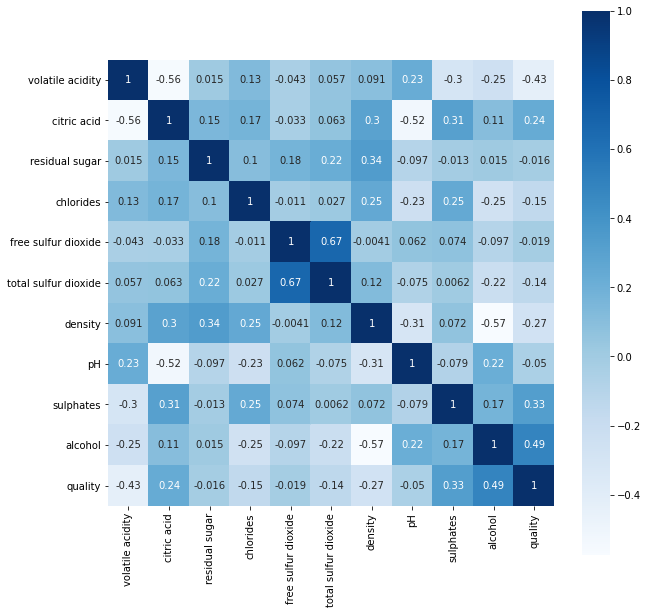

In [78]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

We observe that the "alcohol" attribute has strong correlation with the "quality" attribute.
We now plot different features vs quality.

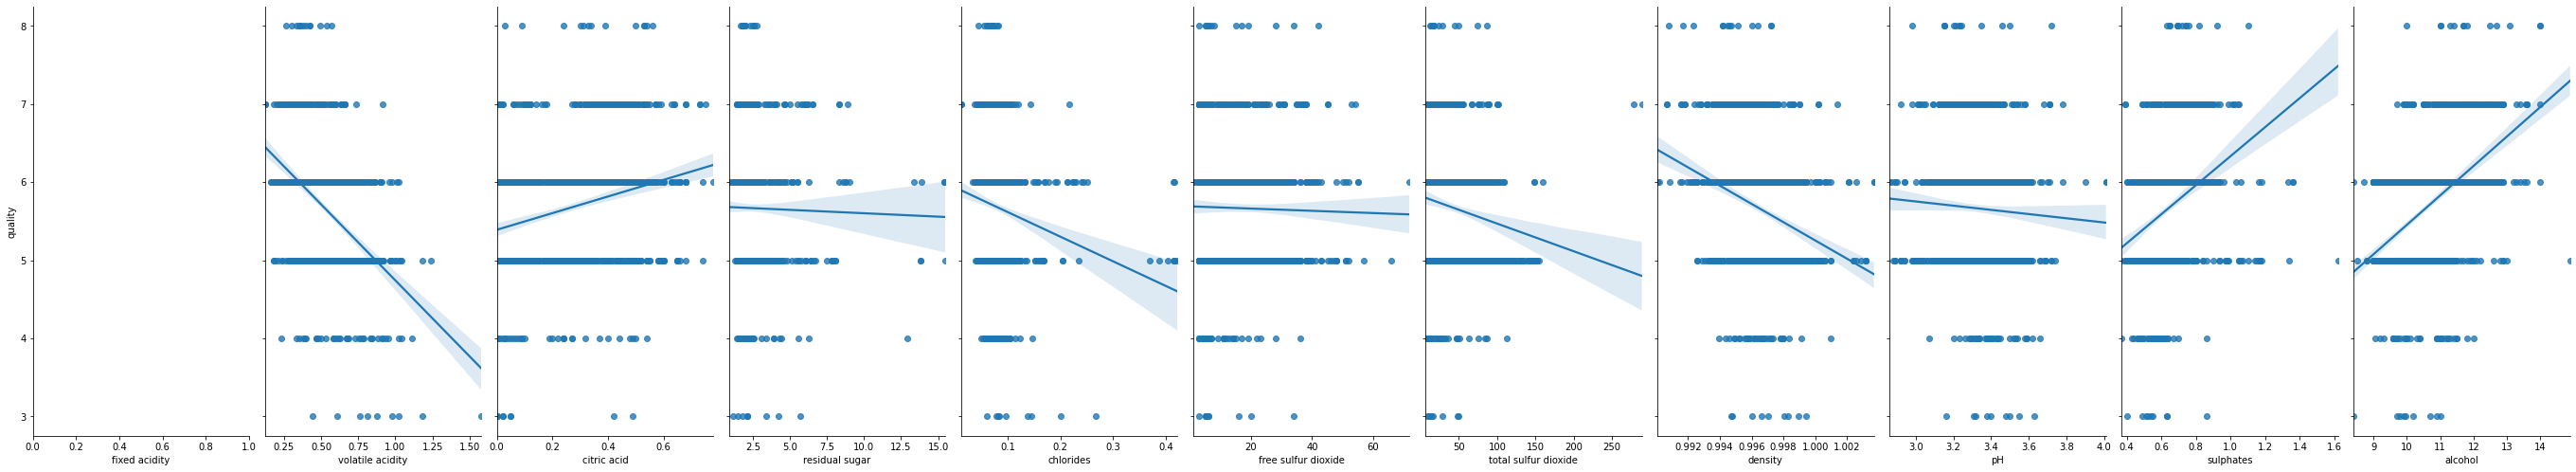

In [99]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
x = df[features]
y = df['quality']
#plotting features vs quality
sns.pairplot(df,x_vars=features,y_vars='quality',kind='reg',height=7,aspect=0.5)

We now format the test dataset to predict and assess the error and accuracy in the model.

In [83]:
df_test=pd.read_csv('wineQualityRed_test.csv', sep=';', names=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"])
df_test = df_test.iloc[1:]

This snippet trains the Linear regression model and checks the sum of
square error calculated between the predicted value from the features of the test dataset and the actual value for the "quality" attribute.

In [110]:
regression = LinearRegression()
reg = regression.fit(df[features],df['quality'])
y_pred = reg.predict(df_test[features])
y_test = df_test['quality']
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)
print('Sum of square error: %.2f' %np.sum(np.power(y_test-y_pred,2)))

Coefficients: 
 [-5.73100144e-03 -1.07148926e+00 -6.30475021e-02  1.02337212e-02
 -1.94044757e+00  3.51582257e-03 -2.15501378e-03 -2.68912590e+01
 -6.34244261e-01  1.24194845e+00  2.67754540e-01]
Intercept: 
 31.741831140740473
Mean squared error: 214.23


As we observed earlier that "alcohol" has the most correlation with "quality", we try to fit alcohol and quality in a new linear regression model and plot the spread.

Text(0, 0.5, 'Quality')

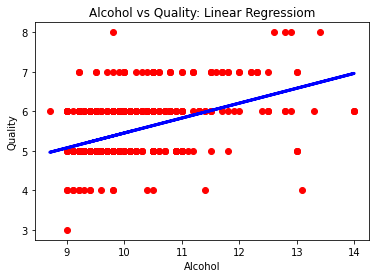

In [119]:
regression = LinearRegression()
X_train = np.array(df['alcohol']).reshape(-1, 1)
reg = regression.fit(X_train,df['quality'])
X_test = np.array(df_test['alcohol']).reshape(-1, 1)
y_pred = reg.predict(X_test)
y_test = df_test['quality']
# Plot outputs
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title("Alcohol vs Quality: Linear Regressiom")
plt.xlabel("Alcohol")
plt.ylabel("Quality")